# Maximum Annual Peak Flow Discharge for Alabama State (MAPFD-AL) through XGBR

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
from sklearn.inspection import permutation_importance
import time
import math
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import pearsonr
from math import sqrt

## Import dataset

In [2]:
# Import the training dataset
df_train = pd.read_csv('./data/df_Train_Qpeak_new.csv', converters={'site_no': str}, low_memory=False)

# Import the testing dataset
df_test = pd.read_csv('./data/df_Test_Qpeak_new.csv', converters={'site_no': str}, low_memory=False)

In [3]:
# Spliting the dependent (y) variable and independent (X) variables for training dataset
y_train = df_train[['Q_peak_obs']]
X_train = df_train[['width_bnk', 'depth_bnk', 'width_mean','depth_mean', 
                    'ACC_NDAMS2000', 'CAT_POPDENS00', 'StreamOrde', 'TotDASqKM',
                    'NLCD_Developed_%', 'NLCD_Forest_%','NLCD_Agriculture_%', 
                    'D50_mm_', 'Mean_AI', 'CAT_SILTAVE', 'CAT_CLAYAVE', 'CAT_SANDAVE',
                    'MINELEVSMO', 'SLOPE','QA_cms', 'QC_cms', 'QE_cms', 
                    'WETINDEXCAT', 'RUNOFFCAT','TMEAN8110CAT', 'HYDRLCONDCAT']]

# Spliting the dependent (y) variable and independent (X) variables for testing dataset 
y_test = df_test[['Q_peak_obs']]
X_test = df_test[['width_bnk', 'depth_bnk', 'width_mean','depth_mean', 
                    'ACC_NDAMS2000', 'CAT_POPDENS00', 'StreamOrde', 'TotDASqKM',
                    'NLCD_Developed_%', 'NLCD_Forest_%','NLCD_Agriculture_%', 
                    'D50_mm_', 'Mean_AI', 'CAT_SILTAVE', 'CAT_CLAYAVE', 'CAT_SANDAVE',
                    'MINELEVSMO', 'SLOPE','QA_cms', 'QC_cms', 'QE_cms', 
                    'WETINDEXCAT', 'RUNOFFCAT','TMEAN8110CAT', 'HYDRLCONDCAT']]

## XGBoost Regression model

### a) Primary training

In [4]:
# Define the range of XGBR hyperparameters 
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
              'max_depth': range(3, 8, 1),
              'min_child_weight': range(3, 8, 1),
              'subsample': [0.7, 0.8, 0.9, 1.0],
              'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
              }
XGB = XGBRegressor(random_state = 42)
XGB_grid = GridSearchCV(estimator = XGB, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 4)

In [5]:
# Train the model using defined XGBR hyperparameters 
XGB_grid.fit(X_train.to_numpy(), y_train.to_numpy().ravel())

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=4

In [6]:
# Printing the best results out of training models
print(XGB_grid.best_params_)
print(XGB_grid.best_score_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.7}
-1338512.3390823388


### b) Final training

In [7]:
# Define the final XGBR hyperparameters 
xgb = XGBRegressor(colsample_bytree = 1.0, 
                   learning_rate = 0.1, 
                   max_depth = 7, 
                   min_child_weight = 3, 
                   subsample = 0.7, 
                   random_state =42)

In [8]:
# Spliting the dependent (y) variable and independent (X) variables for training dataset
y_train = df_train[['Q_peak_obs']]
X_train = df_train[['width_bnk', 'depth_bnk', 'width_mean','depth_mean', 
                    'ACC_NDAMS2000', 'CAT_POPDENS00', 'StreamOrde', 'TotDASqKM',
                    'NLCD_Developed_%', 'NLCD_Forest_%','NLCD_Agriculture_%', 
                    'D50_mm_', 'Mean_AI', 'CAT_SILTAVE', 'CAT_CLAYAVE', 'CAT_SANDAVE',
                    'MINELEVSMO', 'SLOPE','QA_cms', 'QC_cms', 'QE_cms', 
                    'WETINDEXCAT', 'RUNOFFCAT','TMEAN8110CAT', 'HYDRLCONDCAT']]

# Spliting the dependent (y) variable and independent (X) variables for testing dataset 
y_test = df_test[['Q_peak_obs']]
X_test = df_test[['width_bnk', 'depth_bnk', 'width_mean','depth_mean', 
                    'ACC_NDAMS2000', 'CAT_POPDENS00', 'StreamOrde', 'TotDASqKM',
                    'NLCD_Developed_%', 'NLCD_Forest_%','NLCD_Agriculture_%', 
                    'D50_mm_', 'Mean_AI', 'CAT_SILTAVE', 'CAT_CLAYAVE', 'CAT_SANDAVE',
                    'MINELEVSMO', 'SLOPE','QA_cms', 'QC_cms', 'QE_cms', 
                    'WETINDEXCAT', 'RUNOFFCAT','TMEAN8110CAT', 'HYDRLCONDCAT']]

# Train the model using the final XGBR hyperparameters 
xgb.fit(X_train.to_numpy(), y_train.to_numpy().ravel())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [19]:
# Import and save the final trained model 
with open('./Data/XGBR_best_param', "wb") as fp:
    pickle.dump(xgb, fp)

In [20]:
# Export the final trained model 
with open('./Data/XGBR_best_param', "rb") as fp:
    xgb = pickle.load(fp)

In [21]:
# Make prediction on training dataset using final trained model
xgb_pred_train = xgb.predict(X_train)
xgb_pred_train = np.array(xgb_pred_train).reshape(-1,)
y_train = np.array(y_train).reshape(-1,)

# Make prediction on training dataset using final trained model
xgb_pred_test = xgb.predict(X_test)
xgb_pred_test = np.array(xgb_pred_test).reshape(-1,)
y_test = np.array(y_test).reshape(-1,)

## Validation through Performance Metrics

In [22]:
Metrics = pd.DataFrame()
Model_names = [ 'Train', 'Test']
pred_list = [[ xgb_pred_train, xgb_pred_test]]
obs_list = [[ y_train, y_test]]

for i in range(0,2):
    X = obs_list[0][i]
    Y = pred_list[0][i]
    r2 = np.corrcoef(X, Y)[0, 1]**2
    abs_pbias = 100 * np.sum(abs(Y - X)) / np.sum(X)
    nse = 1 - np.sum((X - Y)**2) / np.sum((X - np.mean(X))**2)
    rmse = np.sqrt(np.mean(np.square(X - Y)))
    r = np.corrcoef(X, Y)[0, 1]
    s = np.std(Y) / np.std(X)
    b = np.mean(Y) / np.mean(X)
    kge = 1 - np.sqrt((r - 1)**2 + (s - 1)**2 + (b - 1)**2)
    df = pd.DataFrame({f'{Model_names[i]}': [ format(r2, ".2f"), format(nse, ".2f"), format(kge, ".2f"), format(abs_pbias, ".2f"), format(rmse, ".2f")]})
    Metrics= pd.concat([df, Metrics], axis=1)

Metrics = Metrics.rename( index={  0:'R\N{SUPERSCRIPT TWO}', 1:'NSE', 2:'KGE', 3:'APB (%)',  4:'RMSE (cms)'})
Metrics.style

,Test,Train
R²,0.82,0.99
NSE,0.76,0.99
KGE,0.80,0.95
APB (%),35.43,4.54
RMSE (cms),1011.53,221.81


## Visualization of Scatter and Violin Plots for Training and Testing Datasets

Text(0.5, 0.98, 'Maximum Annual Peak Flow Discharge - XGBR model\n ')

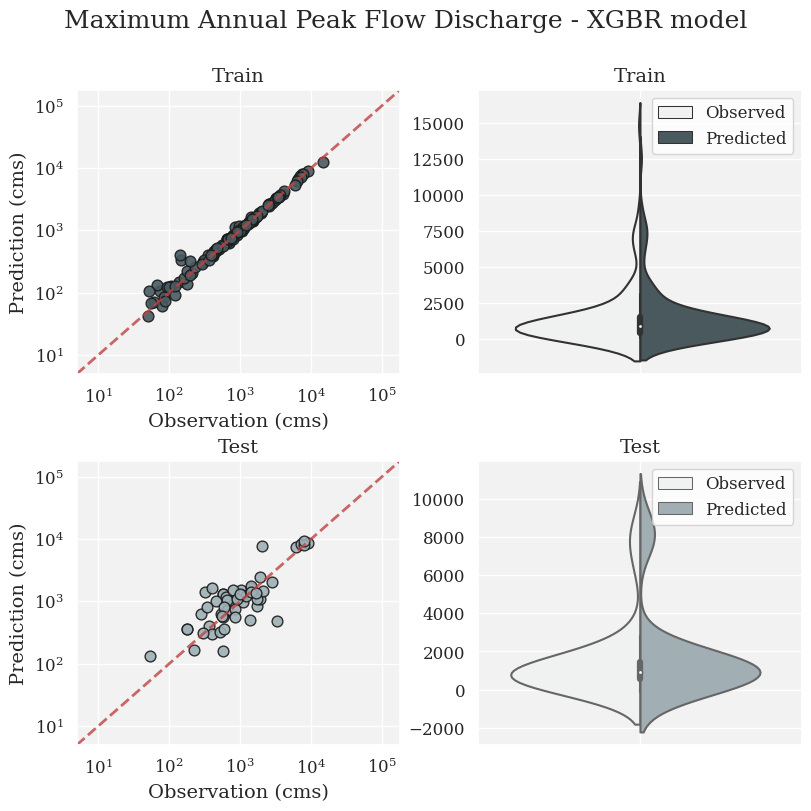

In [23]:
sns.set(style='darkgrid')
plt.rcParams.update({'font.family': 'serif'})

fc= [ '#475B61', '#9EB1B7']
Model_names = [ 'Train', 'Test']
pred_list = [[ xgb_pred_train, xgb_pred_test]]
obs_list = [[ y_train, y_test]]

max_value_test = np.array((y_test,  xgb_pred_test)).max()
max_value_train = np.array((y_train, xgb_pred_train)).max()
min_value_test = np.array(( y_test,  xgb_pred_test)).min()
min_value_train = np.array((y_train, xgb_pred_train)).min()

fig, axs = plt.subplots(2,2, figsize=(8, 8), constrained_layout=True)

for i in range(0,2):
    X = obs_list[0][i]
    Y = pred_list[0][i]
    max_value = 100000
    min_value =  10
    axs[i,0].scatter(X, Y, color=fc[i], edgecolor='k', alpha=0.9, s=60)  
    axs[i,0].set_yscale('log')
    axs[i,0].set_xscale('log')
    axs[i,0].plot([0.5*min_value, 1.8*max_value], [0.5*min_value, 1.8*max_value], '--', color='#bf4342', linewidth=2, alpha=0.8)
    axs[i,0].set_xlabel("Observation (cms)", fontsize=14)
    axs[i,0].set_ylabel("Prediction (cms)", fontsize=14)
    axs[i,0].grid(True)
    axs[i,0].set_xlim(0.5*min_value, 1.8*max_value)
    axs[i,0].set_ylim(0.5*min_value, 1.8*max_value)
    axs[i,0].set_facecolor("#f2f2f2")   
    axs[i,0].set_title(Model_names[i], size=14)
    axs[i,0].tick_params(labelsize=12)
       
    data_train = pd.DataFrame({'Observed':X, 'Predicted':Y})
    data_train = data_train.melt()
    data_train.rename(columns = {'value':'counts'}, inplace = True)
    data_train[' '] = ' '

    sns.violinplot(data = data_train, y= 'counts', split=True, hue='variable',  x=' ', color=fc[i], ax=axs[i,1])
    axs[i,1].set_facecolor("#f2f2f2")  
    axs[i,1].grid(True)
    axs[i,1].set_ylabel("", fontsize=12)
    axs[i,1].set_title(Model_names[i], size=14)
    axs[i,1].tick_params(labelsize=12)
    axs[i,1].legend(title=False ,facecolor = "w",fontsize=12)

fig.suptitle('Maximum Annual Peak Flow Discharge - XGBR model\n ', size=18, x= 0.5)

## Mean Decrease in Impurity Analysis

In [28]:
Columns =  ['$w_{bnk}$','$d_{bnk}$', '$w_{mf}$', '$d_{mf}$', 'ND', 'PD', 'SO',
            'DA','Dv', 'Fr','Ag', '$D_{50}$', 'AI','Si', 'Cl', 'Sa',         
            'Z', 'S', '$Q_{A}$','$Q_{C}$', '$Q_{E}$','WI', 'Ro', '$T_{min}$', 'K']

result_train = permutation_importance(xgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
importances_train = xgb.feature_importances_

xgb_importances_MDI_train = pd.Series(importances_train, index=Columns)
xgb_importances_MDI_train.sort_values(ascending=True, inplace=True)
xgb_importances_MDI_train = xgb_importances_MDI_train.multiply(100)
xgb_importances_MDI_train = xgb_importances_MDI_train.round( decimals=2)

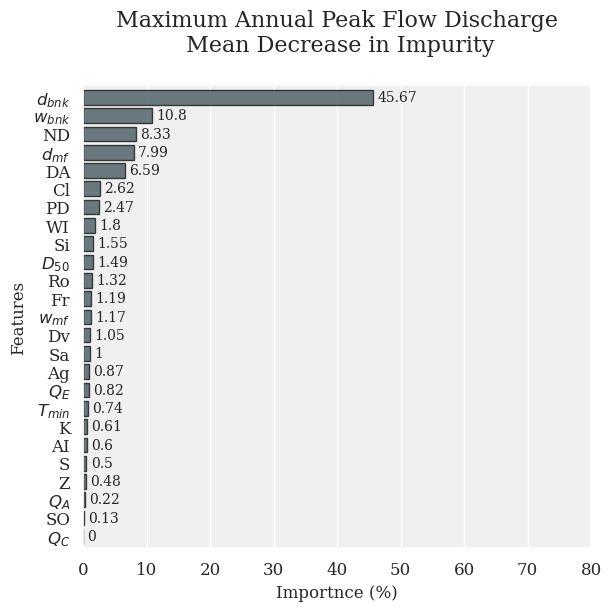

In [37]:
sns.set(style='darkgrid')
plt.rcParams.update({'font.family': 'serif'})

fig, axs = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)

xgb_importances_MDI_train.plot.barh( color='#475B61', edgecolor='k', alpha=0.8,  width = 0.8) 
axs.set_title('Maximum Annual Peak Flow Discharge\n Mean Decrease in Impurity\n', size=16)
axs.set_ylabel("Features", size= 12)
axs.set_xlabel("Importnce (%)", size= 12)
axs.tick_params(labelsize=12)
axs.set_facecolor("#F0F0F0")
axs.set_xlim([0, 80])
axs.bar_label(axs.containers[0], label_type='edge', size=10, padding=3)
axs.yaxis.grid(False)
axs.xaxis.grid(True)


plt.show()

## Mean Decrease in Accuracy Analysis

In [36]:
Columns =  ['$w_{bnk}$','$d_{bnk}$', '$w_{mf}$', '$d_{mf}$', 'ND', 'PD', 'SO',
            'DA','Dv', 'Fr','Ag', '$D_{50}$', 'AI','Si', 'Cl', 'Sa',         
            'Z', 'S', '$Q_{A}$','$Q_{C}$', '$Q_{E}$','WI', 'Ro', '$T_{min}$', 'K']


result_train= permutation_importance(xgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

xgb_importances_MAD_train = pd.Series(result_train.importances_mean, index=Columns)
xgb_importances_MAD_train.sort_values(ascending=True, inplace=True)
xgb_importances_MAD_train = xgb_importances_MAD_train.multiply(100)
xgb_importances_MAD_train = xgb_importances_MAD_train.round( decimals=2)

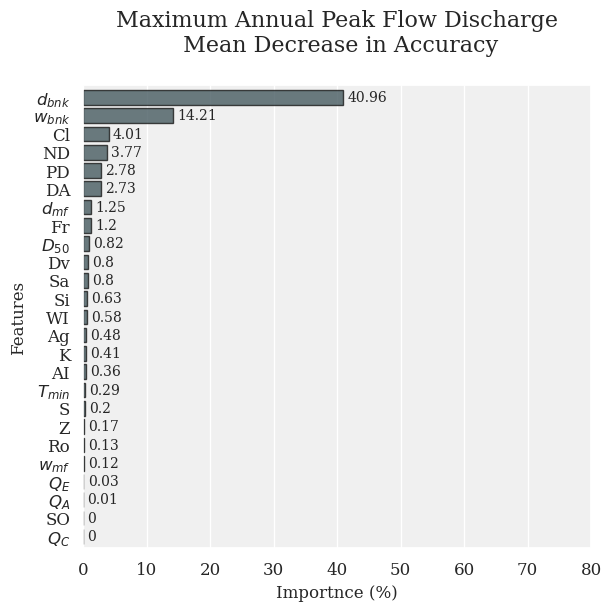

In [39]:
sns.set(style='darkgrid')
plt.rcParams.update({'font.family': 'serif'})

fig, axs = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)

xgb_importances_MAD_train.plot.barh( color='#475B61', edgecolor='k', alpha=0.8,  width = 0.8) 
axs.set_title('Maximum Annual Peak Flow Discharge\n Mean Decrease in Accuracy\n', size=16)
axs.set_ylabel("Features", size= 12)
axs.set_xlabel("Importnce (%)", size= 12)
axs.tick_params(labelsize=12)
axs.set_facecolor("#F0F0F0")
axs.set_xlim([0, 80])
axs.bar_label(axs.containers[0], label_type='edge', size=10, padding=3)
axs.yaxis.grid(False)
axs.xaxis.grid(True)


plt.show()